In [2]:
import xarray

In [4]:
ds = xarray.open_dataset('pr_ensmean_rcp45_SMHI-RCA4_v1_day_EAfrica_mmpday.nc')

In [6]:
pr = ds['pr']

In [19]:
pr

<xarray.DataArray 'pr' (time: 34675, rlat: 77, rlon: 52)>
[138838700 values with dtype=float32]
Coordinates:
  * time     (time) object 2006-01-01 12:00:00 ... 2100-12-31 12:00:00
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float32 27.28 27.72 28.16 28.6 ... 48.4 48.84 49.28 49.72
  * rlat     (rlat) float32 -16.72 -16.28 -15.84 -15.4 ... 15.84 16.28 16.72
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

# Monthly mean

1. Finding the monthly mean for each year.

In [29]:
pr_monthly_mean = pr.resample(time='1MS').mean(dim='time')

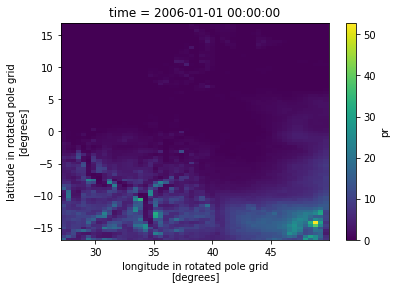

In [69]:
# selecting time=0 or Jan 2006 and visualizing it.
pr_monthly_mean.isel(time=0).plot()

2. Finding the aggregated monthly mean for all years

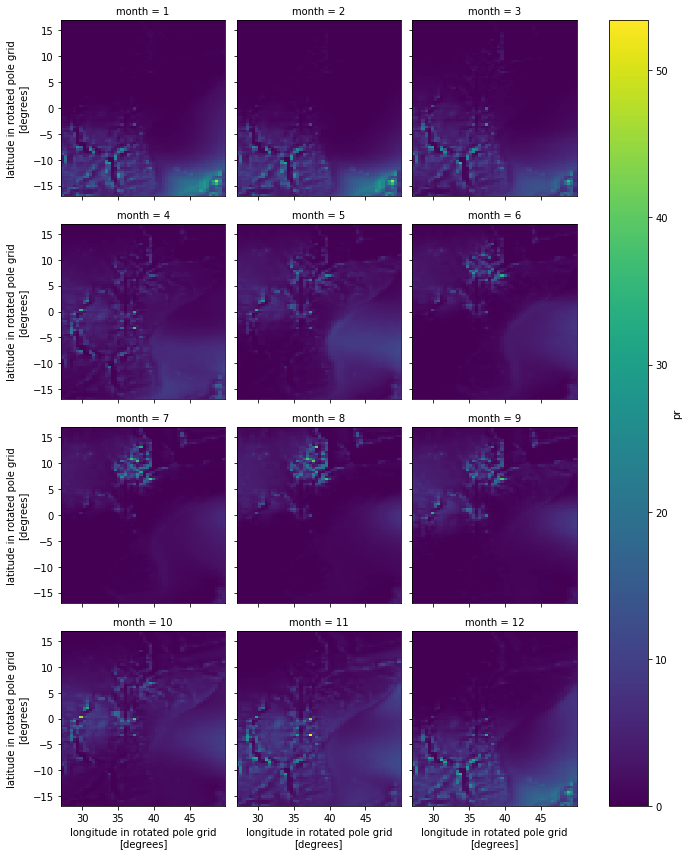

In [41]:
# Grouping by month and visualizing for all precipitation values from 2006-2100
pr.groupby('time.month').mean(dim='time').plot(col='month', col_wrap=3)

# Seasonal mean

1. Seasonal mean for each year

In [57]:
pr_seasonal_mean = pr.resample(time="QS-DEC").mean()

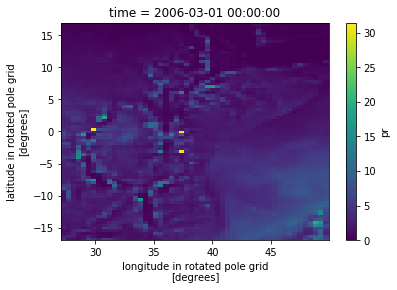

In [61]:
pr_seasonal_mean.isel(time=1).plot()

2. Finding the aggregated seasonal mean for all years 

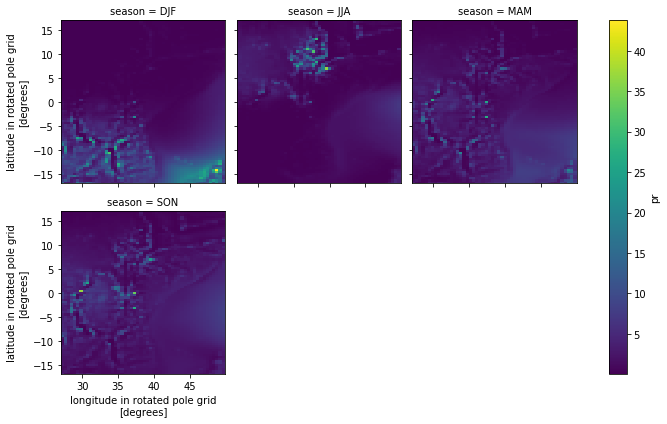

In [62]:
pr.groupby('time.season').mean(dim='time').plot(col='season', col_wrap=3)

# Annual Mean

In [65]:
pr_annual_mean = pr.resample(time="AS").mean()

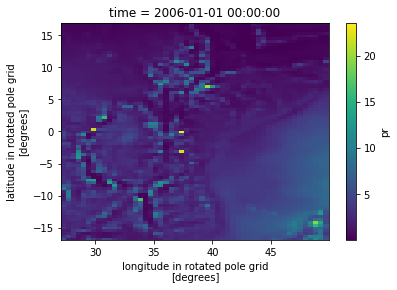

In [67]:
pr_annual_mean.isel(time=0).plot()

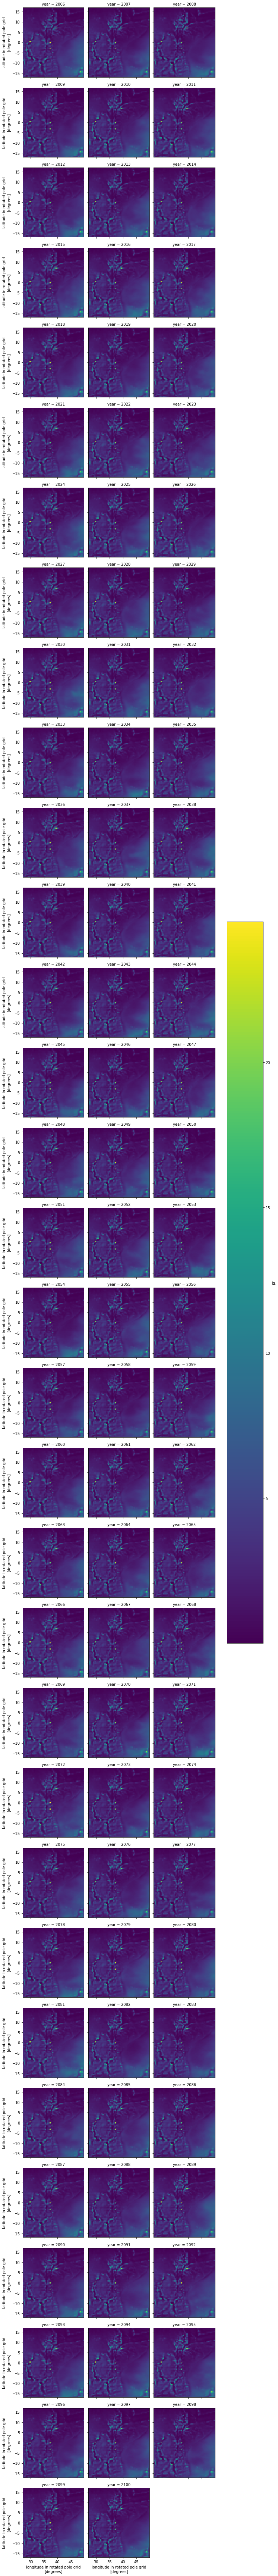

In [45]:
pr.groupby('time.year').mean(dim='time').plot(col='year', col_wrap=3)